# Geopandas

O GeoPandas é um projeto open source para facilitar o trabalho com dados geoespaciais em Python. GeoPandas estende os tipos de dados do pandas fornecendo `operações espaciais em tipos geométricos`. O GeoPandas combina as capacidades do Pandas e da biblioteca Shapely, fornecendo operações geoespaciais do Pandas e uma interface de alto nível para múltiplas geometrias do Shapely. Ele permite que você faça facilmente operações em Python que de outra forma exigiria um banco de dados espacial como o PostGIS.

---
**Fontes geográficas**

No meu caso irei utilizar as coordenadas geograficas fornecidas pelo IBGE (Instituto Brasileiro de Geografia e Estatística)
> Fonte: https://geoftp.ibge.gov.br/

---
**Intalação**

Farei essa instalação por meio do Prompt de Comando, utilizando conda install geopandas==0.3.0.
> Instalação: !conda install geopandas==0.3.0



In [1]:
import geopandas as gpd
from unidecode import unidecode

path = "/mnt/d/Downloads/"

#

BR_INFO = gpd.read_file("/mnt/d/Downloads/BR_UF_2020/BR_UF_2020.shp")

#

RS_INFO = gpd.read_file(
    "/mnt/d/Downloads/RS_Municipios_2020/RS_Municipios_2020.shp")
RS_INFO.NM_MUN = RS_INFO.NM_MUN.apply(
    lambda x: unidecode(x)).apply(lambda x: x.upper())
RS_INFO.NM_MUN = RS_INFO.NM_MUN.replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})

#

BR_UF_MESO_INFO = gpd.read_file(
    "/mnt/d/Downloads/BR_Mesorregioes_2020/BR_Mesorregioes_2020.shp")

---

`A coluna geometry nos possibilita trabalhar justamente com os dados geográficos.`

---

<AxesSubplot:title={'center':'RIO GRANDE DO SUL / MUNICÍPIOS'}>

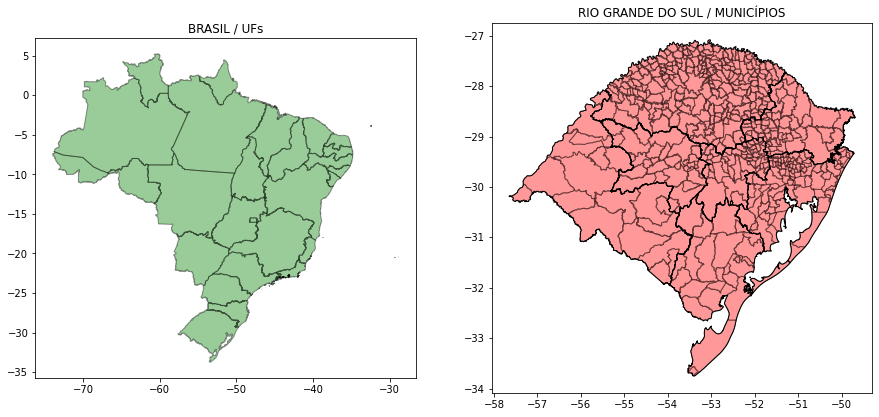

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 8)
fig, (ax1, ax2) = plt.subplots(ncols=2)

# PLOT 1
ax1.set_title("BRASIL / UFs")
BR_INFO.plot(ax=ax1,
             alpha=0.40,
             edgecolor='k',
             color='green')


# PLOT 2
ax2.set_title("RIO GRANDE DO SUL / MUNICÍPIOS")

RS_INFO.plot(ax=ax2,
             alpha=0.40,
             edgecolor='k',
             color='red')

BR_UF_MESO_INFO[BR_UF_MESO_INFO.SIGLA_UF == 'RS'].geometry.boundary.plot(
    color=None, edgecolor='k', linewidth=1, ax=ax2)

**Mas por que trabalhar com dados `georreferenciais`?**

Os cientistas de dados precisam desenvolver a habilidade de trabalhar com qualquer tipo de dados, em qualquer formato, como texto, vídeo, áudio, entre outros. Dispositivos, como os nossos smartphones, enviam informações o tempo todo, dentre elas um componente especial: a localização em que eles estão. Dessa forma, as informações nas nossas redes sociais, por exemplo, são georreferenciadas - afinal, os lugares que frequentamos são bons indicadores das nossas experiências.

Apaixonado pela informação e análise de dados pensei comigo mesmo:

> "*O que pode ser interessante e ao mesmo tempo desafiador para testar meus conhecimentos???*" 

Até que olhando o feed de notícias do `google news` me deparei com a seguinte manchete : "*Como saber quantos carros e motos de cada marca/modelo existem no Brasil? (E na sua cidade)*".

Logo pensei, vou vincular essas informações ao GeoPandas e realizar alguns gráficos para testar o conhecimento.

Prontamente, fui ao site do Governo e coletei informações necessárias para realizar esse "trabalho" acadêmico, como:
* [Quantidade de Veículos por UF Município Ano de Fabricação Modelo*](https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-denatran/estatisticas/renavam/2020/dezembro/f_frota_por_uf_municipio_ano_fab_mod_dezembro_2020.xlsx)
* [Quantidade de Veículos por UF Município e Combustível* ](https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-denatran/estatisticas/renavam/2020/dezembro/d_frota_por_uf_municipio_combustivel_dezembro_2020.xlsx)
* [Quantidade de Veículos por UF Município e Cor*](https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-denatran/estatisticas/renavam/2020/dezembro/c_frota_por_uf_municipio_cor_dezembro_2020.xlsx)
* [Quantidade de Veículos por UF Município Marca e Modelo*](https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-denatran/estatisticas/renavam/2020/dezembro/i_frota_por_uf_municipio_marca_e_modelo_ano_dezembro_2020.zip)
* [Quantidade de Veículos por UF Município Tipo Espécie e Eixos](https://www.gov.br/infraestrutura/pt-br/assuntos/transito/arquivos-denatran/estatisticas/renavam/2020/dezembro/g_frota_por_uf_municipio_tipo_especie_eixos_dezembro_2020.xlsx)


> OBS: Na listagem, os itens que apresentam (*) não apresentam disntição se o veículo é: carro, moto ou caminhão... 

> Fonte: https://www.gov.br/infraestrutura/pt-br/assuntos/transito/conteudo-denatran/frota-de-veiculos-2020

> **ANO : 2020**

--------

# Quantidade de Veículos por UF Município Ano de Fabricação Modelo*

Primeiro desafio começa com a idede média dos veículos(carros,motos,caminhões...)

In [3]:
import numpy as np
import pandas as pd

frota_por_uf_municipio_ano = pd.read_excel(path + 'f_frota_por_uf_municipio_ano_fab_mod_dezembro_2020.xlsx',
                                           engine="openpyxl")

#

frota_por_uf_municipio_ano.Município = frota_por_uf_municipio_ano.Município.apply(
    lambda x: unidecode(x)).apply(lambda x: x.upper())
frota_por_uf_municipio_ano["Ano Modelo"] = pd.to_numeric(
    frota_por_uf_municipio_ano["Ano Modelo"], errors='coerce')
frota_por_uf_municipio_ano = frota_por_uf_municipio_ano.dropna()

#

frota_por_uf_municipio_ano_rs = frota_por_uf_municipio_ano[
    frota_por_uf_municipio_ano.UF == "RIO GRANDE DO SUL"]
frota_por_uf_municipio_ano_rs

#

idade_ponderada_veiculos_rs = frota_por_uf_municipio_ano_rs.groupby("Município").apply(lambda x: 2020 - np.average(
    x["Ano Modelo"], weights=x["Qtd. Veículos"])).to_frame().reset_index().rename(columns={0: 'Media_idade'})

#

RS_INFO = RS_INFO.merge(idade_ponderada_veiculos_rs,
                        left_on='NM_MUN', right_on='Município', how='left')

Vamos utilizar o `PIB do brasil` para ver se exite alguma influencia sobre a idade média dos carros para cada cidade 

> FONTE: https://www.ibge.gov.br/estatisticas/economicas/contas-nacionais/9088-produto-interno-bruto-dos-municipios.html?=&t=downloads

In [4]:
# PIB BRASIL

pib_brasil = pd.read_excel(path + '/PIB dos Municípios.xlsx',
                           sheet_name="PIB_dos_Municípios",
                           engine = "openpyxl")  


pib_cidades_rs = pib_brasil[pib_brasil["Sigla da Unidade da Federação"] == "RS"]

pib_cidades_rs["Nome do Município"] = pib_cidades_rs["Nome do Município"].apply(
    lambda x: unidecode(x)).apply(lambda x: x.upper()).replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})

pib_cidades_rs = pib_cidades_rs[["Nome do Município", "Ano",
                                 "Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)"]]

pib_cidades_rs = pib_cidades_rs.rename(
    columns={"Produto Interno Bruto per capita, \na preços correntes\n(R$ 1,00)": 'PIB'})

pib_cidades_rs_2018 = pib_cidades_rs[pib_cidades_rs.Ano == 2018]

#

RS_INFO = RS_INFO.merge(pib_cidades_rs_2018, left_on='NM_MUN',
                        right_on='Nome do Município', how='left')

/root/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
<ipython-input-4-2e7a80276a55>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pib_cidades_rs["Nome do Município"] = pib_cidades_rs["Nome do Município"].apply(


<AxesSubplot:title={'center':'PIB per capita municípios RS- EXCLUINDO TRIUNFO'}>

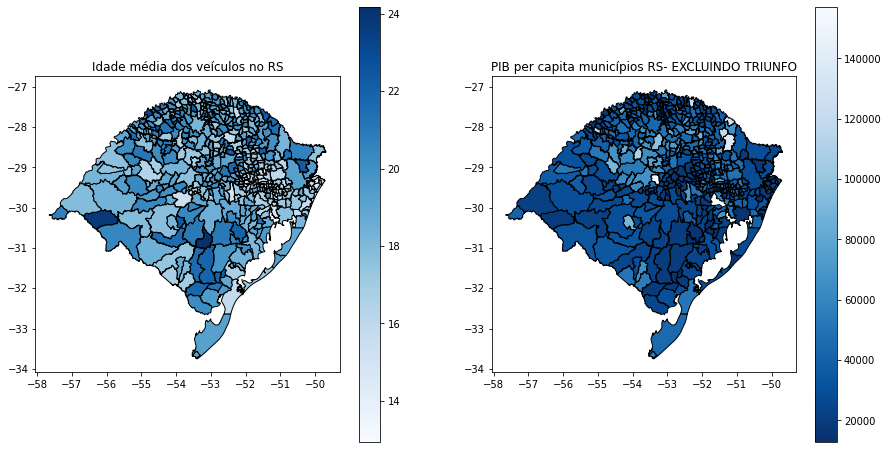

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=2)


ax1.set_title("Idade média dos veículos no RS")
RS_INFO.plot(ax=ax1,
             column="Media_idade",
             cmap='Blues',
             legend=True,
             edgecolor='black'
             )


color_map = plt.cm.get_cmap('Blues')
reversed_color_map = color_map.reversed()


ax2.set_title("PIB per capita municípios RS- EXCLUINDO TRIUNFO")
RS_INFO[RS_INFO.NM_MUN != 'TRIUNFO'].plot(ax=ax2,
                                          column=RS_INFO[RS_INFO.NM_MUN !=
                                                         'TRIUNFO'].PIB,
                                          cmap=reversed_color_map,
                                          legend=True,
                                          edgecolor='black'
                                          )


# Quantidade de Veículos por UF Município e Cor
Segindo os estudos vamos continuidade pelas cores mais populares


In [6]:
frota_por_uf_municipio_cor = pd.read_excel(
    path + "c_frota_por_uf_municipio_cor_dezembro_2020.xlsx")

frota_por_uf_municipio_cor_RS= frota_por_uf_municipio_cor[frota_por_uf_municipio_cor.UF == 'RIO GRANDE DO SUL']
frota_por_uf_municipio_cor_RS.Município = frota_por_uf_municipio_cor_RS.Município.apply(lambda x: unidecode(x)).apply(lambda x: x.upper()).replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})

#

s = frota_por_uf_municipio_cor_RS.groupby(["Município","Cor Veículo"])["Qtd. Veículos"].sum()
cor_mais_fav_RS = s[s == s.groupby(level=0).transform('max')]
cor_mais_fav_RS = cor_mais_fav_RS.to_frame().reset_index()

#

RS_INFO= RS_INFO.merge(cor_mais_fav_RS, left_on='NM_MUN',
                        right_on='Município', how='left')
RS_INFO["Cor Veículo"] = RS_INFO["Cor Veículo"].replace(
    {"BRANCA": "w", "VERMELHA": "r"})

/root/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0.5, 1.0, 'Cores mais populares no RS')

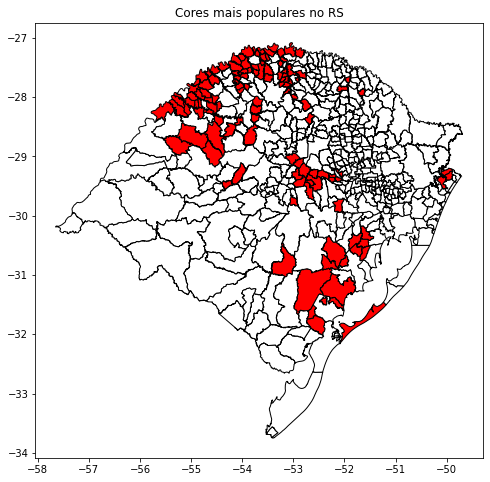

In [7]:
fig, (ax1) = plt.subplots(ncols=1)

RS_INFO.plot(ax=ax1,
    
    color=RS_INFO['Cor Veículo'],
    edgecolor = 'black'
)

#BR_UF_MESO_INFO[BR_UF_MESO_INFO.SIGLA_UF == 'RS'].geometry.boundary.plot(
#    color=None, edgecolor='#00a15b', linewidth=1.5, ax=ax1,
#alpha = 0.80)


plt.title("Cores mais populares no RS")

# Quantidade de Veículos por UF Município Tipo Espécie e Eixos

Seguindo vamos verificar o tipo de Eixo por município

In [8]:
frota_por_uf_municipio_tipo_especie_eixos = pd.read_excel(path + 'g_frota_por_uf_municipio_tipo_especie_eixos_dezembro_2020.xlsx',
                                           engine="openpyxl")
frota_por_uf_municipio_tipo_especie_eixos

,UF,Município,Tipo Veículo,Espécie Veículo,Eixos,Qtd. Veículos
0,ACRE,ACRELANDIA,AUTOMOVEL,COLECAO,0,1
1,ACRE,ACRELANDIA,AUTOMOVEL,PASSAGEIRO,0,1096
2,ACRE,ACRELANDIA,AUTOMOVEL,PASSAGEIRO,2,371
3,ACRE,ACRELANDIA,CAMINHAO,CARGA,0,178
4,ACRE,ACRELANDIA,CAMINHAO,CARGA,1,3
...,...,...,...,...,...,...
244010,TOCANTINS,XAMBIOA,SEMI-REBOQUE,CARGA,3,30
244011,TOCANTINS,XAMBIOA,Sem Informação,Sem Informação,0,4
244012,TOCANTINS,XAMBIOA,TRICICLO,CARGA,0,2
244013,TOCANTINS,XAMBIOA,UTILITARIO,MISTO,0,1


In [9]:
frota_por_uf_municipio_tipo_especie_eixos_RS= frota_por_uf_municipio_tipo_especie_eixos[frota_por_uf_municipio_tipo_especie_eixos.UF == "RIO GRANDE DO SUL"]

frota_por_uf_municipio_tipo_especie_eixos_RS.Município = frota_por_uf_municipio_tipo_especie_eixos_RS.Município.apply(lambda x: unidecode(x)).apply(lambda x: x.upper()).replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})


#

frota_por_uf_municipio_tipo_especie_eixos_RS_agrupado = frota_por_uf_municipio_tipo_especie_eixos_RS.groupby(
    ["Município", "Tipo Veículo"])["Qtd. Veículos"].sum().to_frame().reset_index().pivot(
    index='Município', columns=["Tipo Veículo"])["Qtd. Veículos"].reset_index()


#


RS_INFO = RS_INFO.merge(frota_por_uf_municipio_tipo_especie_eixos_RS_agrupado, left_on='NM_MUN',
                        right_on='Município', how='left')



/root/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


**Estimativas população brasileira 2020**

O IBGE divulga as estimativas de população estaduais e municipais desde 1975.
Assim vamos gerar uma densidade de população



> Fonte https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html

In [10]:
POP_2020_BR = pd.read_excel(path + '/POP2020_20210204 .xls',
                           sheet_name="Municípios",
                           engine = "xlrd",
                         skiprows = 1,
                          nrows=5570
                          )  
POP_2020_BR["NOME DO MUNICÍPIO"] =POP_2020_BR["NOME DO MUNICÍPIO"].apply(
    lambda x: unidecode(x)).apply(lambda x: x.upper()).replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})

POP_2020_RS = POP_2020_BR[POP_2020_BR.UF == "RS"]

RS_INFO = RS_INFO.merge(POP_2020_RS, left_on='NM_MUN',
                        right_on='NOME DO MUNICÍPIO', how='left')

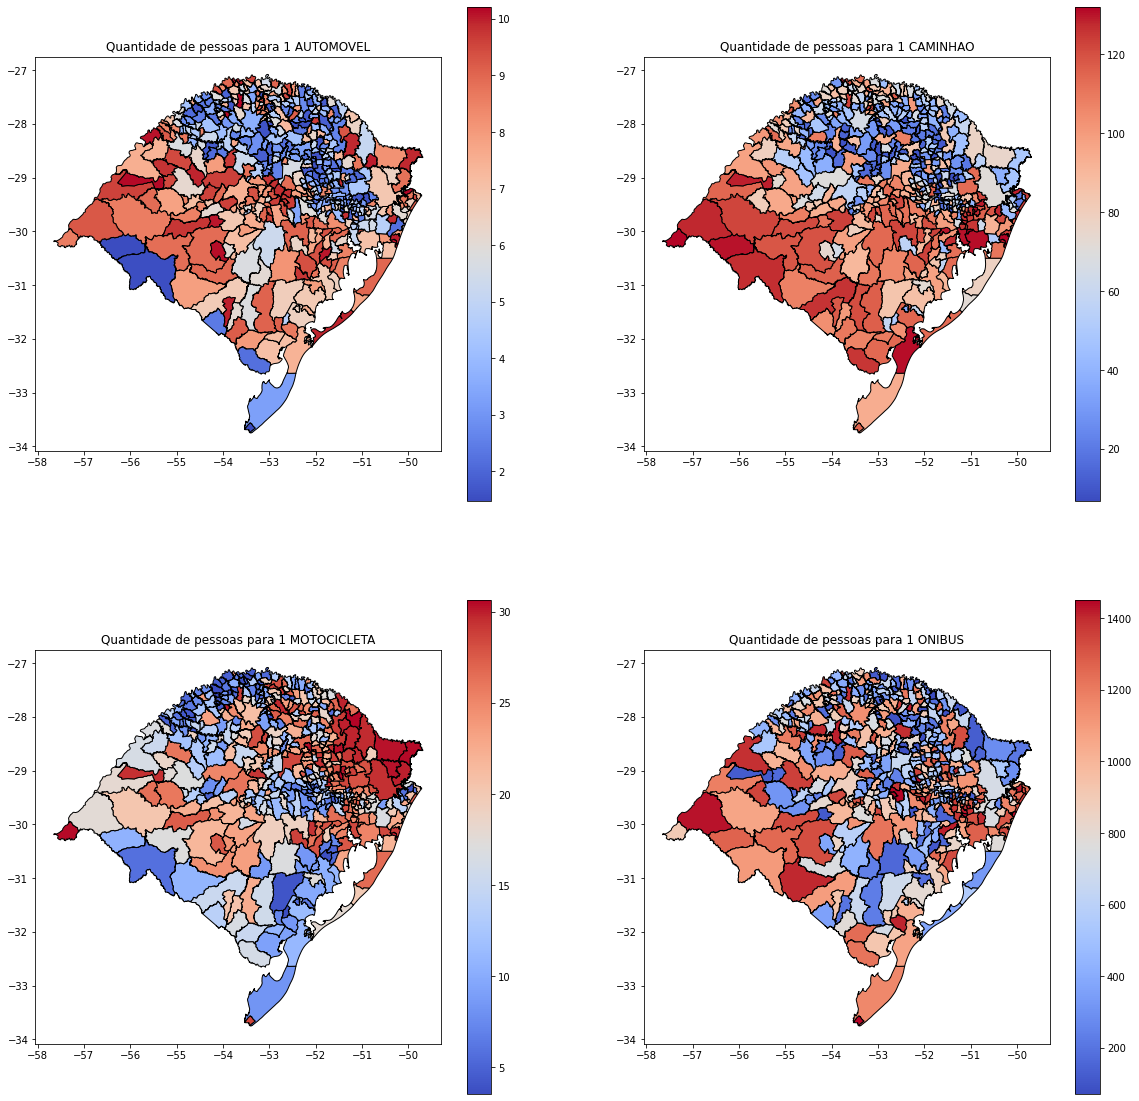

In [15]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20, 20))

from matplotlib import colors

populacao = RS_INFO["POPULAÇÃO ESTIMADA"]
lista_colunas = ['AUTOMOVEL', 'CAMINHAO','MOTOCICLETA', 'ONIBUS']
lista_axis = [ax1,ax2,ax3,ax4]

for i,key in enumerate(lista_colunas):
    


    RS_INFO.plot(column=populacao/RS_INFO[key].values,cmap='coolwarm',edgecolor='black',ax=lista_axis[i])
    
    norm = colors.Normalize(vmin=(populacao/RS_INFO[key].values).min(
    ), vmax=(populacao/RS_INFO[key].values).max())
    
    cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
    ax_cbar = fig.colorbar(cbar, ax=lista_axis[i])
    
    
    lista_axis[i].set_title("Quantidade de pessoas para 1 {}".format(key))

# Quantidade de Veículos por UF Município e Combustível

Seguimos verificando os combustustiveis mais populares no estado

In [16]:
frota_por_uf_municipio_combustivel = pd.read_excel(path + 'd_frota_por_uf_municipio_combustivel_dezembro_2020.xlsx',
                                           engine="openpyxl")

frota_por_uf_municipio_combustivel_RS = frota_por_uf_municipio_combustivel[frota_por_uf_municipio_combustivel.UF == "RIO GRANDE DO SUL"]
frota_por_uf_municipio_combustivel_RS.Município = frota_por_uf_municipio_combustivel_RS.Município.apply(lambda x: unidecode(x)).apply(lambda x: x.upper()).replace(
    {"ENTRE-IJUIS": "ENTRE IJUIS", "SANT'ANA DO LIVRAMENTO": "SANTANA DO LIVRAMENTO"})
frota_por_uf_municipio_combustivel_RS_agrupado = frota_por_uf_municipio_combustivel_RS.pivot(index='Município', columns=["Combustível Veículo"])["Qtd. Veículos"].reset_index()
RS_INFO = RS_INFO.merge(frota_por_uf_municipio_combustivel_RS_agrupado, left_on='NM_MUN',
                        right_on='Município', how='left')

/root/miniconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


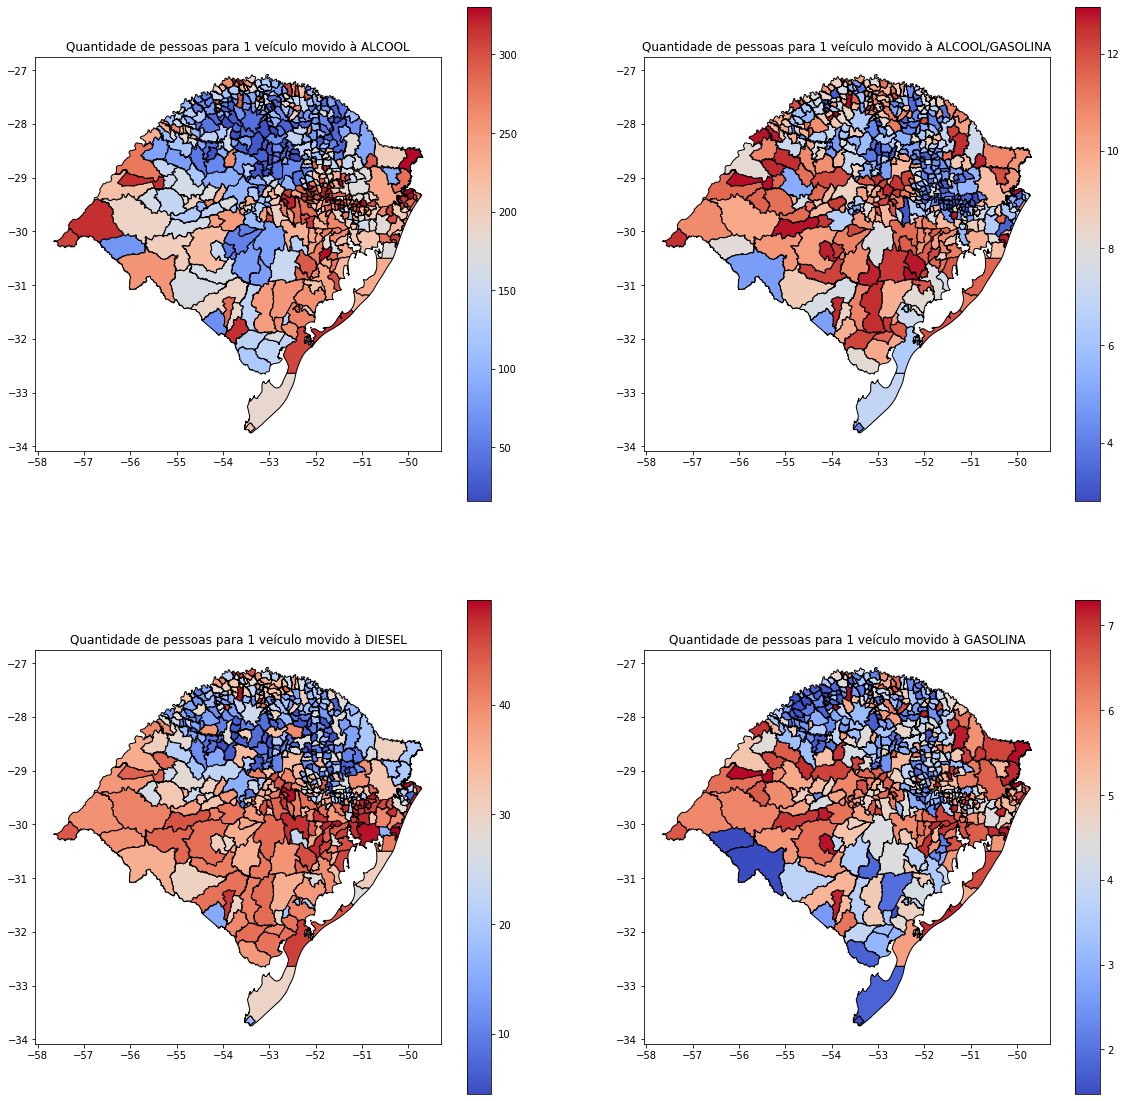

In [17]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(20, 20))

lista_colunas = ['ALCOOL', 'ALCOOL/GASOLINA','DIESEL', 'GASOLINA']
lista_axis = [ax1,ax2,ax3,ax4]

for i,key in enumerate(lista_colunas):
    


    RS_INFO.plot(column=populacao/RS_INFO[key].values,cmap='coolwarm',edgecolor='black',ax=lista_axis[i])
    
    norm = colors.Normalize(vmin=(populacao/RS_INFO[key].values).min(
    ), vmax=(populacao/RS_INFO[key].values).max())
    
    cbar = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')
    ax_cbar = fig.colorbar(cbar, ax=lista_axis[i])
    
    
    lista_axis[i].set_title("Quantidade de pessoas para 1 veículo movido à {}".format(key))

# Quantidade de Veículos por UF Município Marca e Modelo

Agora começa a gambiarra, do frances *fraire de bricolage...*

Nessa etapa do trabalho relizei um filtro através da tabela FIPE para verificar se a marca e o modelo do veículo era um carro ou não. Através de uma [API](https://deividfortuna.github.io/fipe/) da tabela FIPE, verifiquei todas as marcas, modelos, anos do modelos e seus respetivos preços para cada carro. 

Através das informações da tabela FIPE consegui ver as possíveis marcas e possíveis modelos para cada respectiva marca de carro, com essas informções eu realizei um filtro para verificar se a marca/modelo de cada carro estava contida no meu csv de interesse (`i_frota_por_uf_municipio_marca_e_modelo_ano_novembro_2020`, o csv fornecido pela frota do Brasil fornecida pelo governo).


In [18]:
import pandas as pd

# Transformar de txt para CSV
#pd.read_csv(path + "/i_frota_por_uf_municipio_marca_e_modelo_ano_novembro_2020/I_Frota_por_UF_Municipio_Marca_e_Modelo_Ano_Novembro_2020.txt",
#            delimiter='\n', engine='python').to_csv("i_frota_por_uf_municipio_marca_e_modelo_ano_novembro_2020.csv", index=False)
#

frota_por_uf_municipio_marca_e_modelo_ano = pd.read_csv("i_frota_por_uf_municipio_marca_e_modelo_ano_novembro_2020.csv",
                             sep=";")

frota_por_uf_municipio_marca_e_modelo_ano["Marca Modelo"] = frota_por_uf_municipio_marca_e_modelo_ano["Marca Modelo"].str.replace(
    "NOVO", "")  # REMOVI OS NOMES QUE COMEÇAM COM NOVO POIS SÃO MODELOS QUE ALTERAM NO MEU FILTRO 

frota_por_uf_municipio_marca_e_modelo_ano

,UF,Município,Marca Modelo,Ano Fabricação Veículo CRV,Qtd. Veículos
0,ACRE,ACRELANDIA,AGRALE/1800,1989,1.0
1,ACRE,ACRELANDIA,AGRALE/1800,1990,1.0
2,ACRE,ACRELANDIA,AGRALE/1800D RD,1989,1.0
3,ACRE,ACRELANDIA,AGRALE/1800D RD,1990,1.0
4,ACRE,ACRELANDIA,AGRALE/1800D RD,1993,1.0
...,...,...,...,...,...
17752569,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER ED,2014,3.0
17752570,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2014,1.0
17752571,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2015,1.0
17752572,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2018,1.0


---


Aqui em cima nos obtivemos no CSV proposto pelo governo 

Rápidamente já é possível verificar que á presença de caminhões e e motos no DataFrame, por isso precisamos verificar verificar se o modelo é um carro ou não

---

Agora com as informções da tabela FIPE vamos verificar as marcas e modelos que a frota brasileira apresenta.

> OBS: A utilização da API não sera demostrada nesse Notebook, apenas o resultado da API sera utilizada para facilitar o processo.

In [19]:
todas_marcas_modelos_anos_preco_carros = pd.read_csv("todas_marcas_modelos_anos_preco_carros.csv") # CSV TABELA FIPE
todas_marcas_modelos_anos_preco_carros.head(3)

,Unnamed: 0,Valor,Marca,Modelo,AnoModelo,Combustivel,CodigoFipe,MesReferencia,TipoVeiculo,SiglaCombustivel,id_marca,id_modelo,id_ano
0,0,12019,Audi,100 2.8 V6,1995,Gasolina,008030-6,março de 2021,1,G,6,43,1995-1
1,1,11363,Audi,100 2.8 V6,1994,Gasolina,008030-6,março de 2021,1,G,6,43,1994-1
2,2,10185,Audi,100 2.8 V6,1993,Gasolina,008030-6,março de 2021,1,G,6,43,1993-1


Como algumas marcas estão com nome "GM" OU "VW" e outras apresentam com nome "CHEVROLET" ou "VOLKSWAGEN", vou duplicar os possíveis modelos para não ter problema do filtro não encontrar a Marca Modelo do dataframe (`frota_por_uf_municipio_marca_e_modelo_ano`)

In [20]:
# CRIAR NOVA MARCA CHAMADA VW
df_volkswagen = todas_marcas_modelos_anos_preco_carros[todas_marcas_modelos_anos_preco_carros.Marca=="VW - VolksWagen"].replace({"VW - VolksWagen":"VW"})

todas_marcas_modelos_anos_preco_carros = todas_marcas_modelos_anos_preco_carros.append(df_volkswagen)

df_volkswagen = todas_marcas_modelos_anos_preco_carros[todas_marcas_modelos_anos_preco_carros.Marca=="VW - VolksWagen"].replace({"VW - VolksWagen":"VOLKSWAGEN"})

todas_marcas_modelos_anos_preco_carros = todas_marcas_modelos_anos_preco_carros.append(df_volkswagen)

# CRIAR NOVA MARCA CHAMADA GM
df_GM = todas_marcas_modelos_anos_preco_carros[todas_marcas_modelos_anos_preco_carros.Marca=="GM - Chevrolet"].replace({"GM - Chevrolet":"GM"})
todas_marcas_modelos_anos_preco_carros = todas_marcas_modelos_anos_preco_carros.append(df_GM)

df_GM = todas_marcas_modelos_anos_preco_carros[todas_marcas_modelos_anos_preco_carros.Marca=="GM - Chevrolet"].replace({"GM - Chevrolet":"CHEVROLET"})
todas_marcas_modelos_anos_preco_carros = todas_marcas_modelos_anos_preco_carros.append(df_GM)

Agora vamos gerar um filtro para extrair o nome da **marca** presente no dataframe, `frota_por_uf_municipio_marca_e_modelo_ano`, DO GOVERNO, pela coluna `Marca Modelo`.

In [21]:
todas_marcas_modelos_anos_preco_carros.Marca = todas_marcas_modelos_anos_preco_carros.Marca.apply(
    lambda x: unidecode(x)).apply(
    lambda x: x.upper())

frota_por_uf_municipio_marca_e_modelo_ano["Marca Modelo"] = frota_por_uf_municipio_marca_e_modelo_ano["Marca Modelo"].apply(
    lambda x: unidecode(str(x))).apply(lambda x: str(x).upper())

lista_marcas_carros = list(set(todas_marcas_modelos_anos_preco_carros.Marca))

frota_por_uf_municipio_marca_e_modelo_ano["marcas"] = frota_por_uf_municipio_marca_e_modelo_ano["Marca Modelo"].str.extract(
    "(" + "|".join(lista_marcas_carros) + ")")

In [22]:
frota_por_uf_municipio_marca_e_modelo_ano

,UF,Município,Marca Modelo,Ano Fabricação Veículo CRV,Qtd. Veículos,marcas
0,ACRE,ACRELANDIA,AGRALE/1800,1989,1.0,NaN
1,ACRE,ACRELANDIA,AGRALE/1800,1990,1.0,NaN
2,ACRE,ACRELANDIA,AGRALE/1800D RD,1989,1.0,NaN
3,ACRE,ACRELANDIA,AGRALE/1800D RD,1990,1.0,NaN
4,ACRE,ACRELANDIA,AGRALE/1800D RD,1993,1.0,NaN
...,...,...,...,...,...,...
17752569,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER ED,2014,3.0,NaN
17752570,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2014,1.0,NaN
17752571,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2015,1.0,NaN
17752572,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2018,1.0,NaN


É possível verificar que algumas marcas o modelo já nem conseguiu verificar se é uma marca de um carro

-------

Agora vamos gerar um filtro para extrair o nome do **modelo** presente no dataframe, `frota_por_uf_municipio_marca_e_modelo_ano`, DO GOVERNO, pela coluna `Marca Modelo`, filtrando pela mesma marca fornecida pelo filtro gerado para fornecer a marca do veículo.

In [23]:
from unidecode import unidecode
import re


marcas = frota_por_uf_municipio_marca_e_modelo_ano.marcas.unique()

_ = pd.Series([])

for marca in marcas:

    lista_modelos_carros = list(
        todas_marcas_modelos_anos_preco_carros[todas_marcas_modelos_anos_preco_carros.Marca == marca].Modelo) # SELECIONA A MESMA MARCA
    lista_modelos_carros = [x.upper() for x in lista_modelos_carros] # BOTA EM MAIUSCULO
    lista_modelos_carros_dividida = [
        x.split(" ") for x in lista_modelos_carros] # DIVIDE AS MARCAS POR ESPACO

    lista_modelos_carros = list(
        set([x.split(" ")[0] for x in lista_modelos_carros]))  # PRIMEIRA PARTE DO NOME

    lista_modelos_carros_2 = list(
        set([x[1] for x in lista_modelos_carros_dividida if len(x) > 1]))  # SEGUNDA PARTE DO NOME
    lista_modelos_carros_2 = list(
        set([x for x in lista_modelos_carros_2 if len(x) > 5]))  # TEM QUE SER MAIOR QUE 4 LETRAS 

    ######

    import re
    lista_modelos_carros = [re.sub('/|-|!', '', i) for i in lista_modelos_carros] # NAO PODE TER / OU -

    lista_modelos_carros = list(filter(None, lista_modelos_carros)) # NAO PODE TER CARATERES VAZIO

    lista_modelos_carros_2 = [re.sub('[0.-9]|""', '', i)
                              for i in lista_modelos_carros_2] # RETIRA O NOME DOS CARROS 

    lista_modelos_carros_2 = list(filter(None, lista_modelos_carros_2)) # NAO PODE TER CARATERES VAZIO

    lista_modelos_carros_3 = lista_modelos_carros_2 + lista_modelos_carros # SOMA A LISTA COM PRIMEIRA PARTE A SEGUNDA
    lista_modelos_carros_3 = list(
        set([x for x in lista_modelos_carros_3 if len(x) > 1]))
    
    ####
    try:
        
        tmp = frota_por_uf_municipio_marca_e_modelo_ano[frota_por_uf_municipio_marca_e_modelo_ano.marcas == marca]["Marca Modelo"].str.extract("(" + "|".join(lista_modelos_carros_3) + ")")
        _ = _.append(tmp[0])
        frota_por_uf_municipio_marca_e_modelo_ano["modelo"] = _

        

    except:
        pass

frota_por_uf_municipio_marca_e_modelo_ano

<ipython-input-23-506e2f408871>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _ = pd.Series([])


,UF,Município,Marca Modelo,Ano Fabricação Veículo CRV,Qtd. Veículos,marcas,modelo
0,ACRE,ACRELANDIA,AGRALE/1800,1989,1.0,NaN,NaN
1,ACRE,ACRELANDIA,AGRALE/1800,1990,1.0,NaN,NaN
2,ACRE,ACRELANDIA,AGRALE/1800D RD,1989,1.0,NaN,NaN
3,ACRE,ACRELANDIA,AGRALE/1800D RD,1990,1.0,NaN,NaN
4,ACRE,ACRELANDIA,AGRALE/1800D RD,1993,1.0,NaN,NaN
...,...,...,...,...,...,...,...
17752569,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER ED,2014,3.0,NaN,NaN
17752570,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2014,1.0,NaN,NaN
17752571,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2015,1.0,NaN,NaN
17752572,TOCANTINS,XAMBIOA,YAMAHA/YS150 FAZER SED,2018,1.0,NaN,NaN


In [24]:
# SE NAO ENCONTROU O MEDELO PARA AQUELA POSSÍVEL MARCA... ENTÃO NÃO É CARRO... SIMPLES ASSIM HEHEHEHEHE

frota_por_uf_municipio_marca_e_modelo_ano_carros_BR = frota_por_uf_municipio_marca_e_modelo_ano[
    frota_por_uf_municipio_marca_e_modelo_ano.modelo.isna() == False]

frota_por_uf_municipio_marca_e_modelo_ano_carros_RS = frota_por_uf_municipio_marca_e_modelo_ano_carros_BR[
    frota_por_uf_municipio_marca_e_modelo_ano_carros_BR.UF == "RIO GRANDE DO SUL"]

frota_por_uf_municipio_marca_e_modelo_ano_carros_RS["Ano Fabricação Veículo CRV"] = pd.to_numeric(
    frota_por_uf_municipio_marca_e_modelo_ano_carros_RS["Ano Fabricação Veículo CRV"], errors='coerce')


frota_por_uf_municipio_marca_e_modelo_ano_carros_RS

<ipython-input-24-643a84a52063>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frota_por_uf_municipio_marca_e_modelo_ano_carros_RS["Ano Fabricação Veículo CRV"] = pd.to_numeric(


,UF,Município,Marca Modelo,Ano Fabricação Veículo CRV,Qtd. Veículos,marcas,modelo
10357491,RIO GRANDE DO SUL,ACEGUA,AUDI/A3 1.8T,1999.0,1.0,AUDI,A3
10357513,RIO GRANDE DO SUL,ACEGUA,CHEVROLET/CELTA 1.0L LS,2011.0,3.0,CHEVROLET,CELTA
10357514,RIO GRANDE DO SUL,ACEGUA,CHEVROLET/CELTA 1.0L LT,2012.0,1.0,CHEVROLET,CELTA
10357515,RIO GRANDE DO SUL,ACEGUA,CHEVROLET/CLASSIC,2009.0,1.0,CHEVROLET,CLASSIC
10357516,RIO GRANDE DO SUL,ACEGUA,CHEVROLET/CLASSIC,2010.0,1.0,CHEVROLET,CLASSIC
...,...,...,...,...,...,...,...
12244513,RIO GRANDE DO SUL,XANGRI-LA,VW/VOYAGE LS,1985.0,2.0,VW,VOYAGE
12244514,RIO GRANDE DO SUL,XANGRI-LA,VW/VOYAGE LS,1986.0,1.0,VW,VOYAGE
12244515,RIO GRANDE DO SUL,XANGRI-LA,VW/VOYAGE S,1983.0,2.0,VW,VOYAGE
12244516,RIO GRANDE DO SUL,XANGRI-LA,VW/VOYAGE TL MA,2014.0,2.0,VW,VOYAGE


In [25]:
frota_por_uf_municipio_marca_e_modelo_ano_carros_RS["Qtd. Veículos"].sum() 

4793020.0

De acordo com as estatísticas fornecida pelo DETRAN RS a frota de automóveis do Rio Grande do Sul Fica em torno de 4.321.142, porém com meu filtro de modelos e marcas, meu modelo preveu 4.793.020 carros. Siginifica que meu modelo preveu mais carros que o DETRAN prevê para o ano de 2021.
> FONTE: https://detran-admin.rs.gov.br/upload/arquivos/202103/04164031-01-frota-do-rs.pdf

Agora vamos verificar o medelo ganhador, o modelo que apresenta mais unidades no brasil em todos os tempos e também vamos verificar o medelo recente (5 anos) mais popular nos últimos anos, para cada cidade.

In [26]:
todos_tempos = frota_por_uf_municipio_marca_e_modelo_ano_carros_RS.groupby(
    ["Município", "marcas", "modelo"])["Qtd. Veículos"].sum()
ganhador_todos_tempos = todos_tempos[todos_tempos == todos_tempos.groupby(
    level=0).transform('max')]  # SELECIONA O SEGUNDO INDEX
ganhador_todos_tempos = pd.DataFrame(ganhador_todos_tempos).reset_index()
ganhador_todos_tempos = ganhador_todos_tempos.drop_duplicates(subset=[
                                                              'Município'])
ganhador_todos_tempos = ganhador_todos_tempos.rename(columns = {'marcas': 'marcas_todos_tempos', 'modelo': 'modelo_todos_tempos'})

RS_INFO = RS_INFO.merge(ganhador_todos_tempos,
                        left_on='NM_MUN', right_on='Município', how='left')

ganhador_todos_tempos

,Município,marcas_todos_tempos,modelo_todos_tempos,Qtd. Veículos
0,ACEGUA,VW,GOL,483.0
1,AGUA SANTA,VW,GOL,313.0
2,AGUDO,VW,GOL,1085.0
3,AJURICABA,VW,GOL,426.0
4,ALECRIM,VW,GOL,451.0
...,...,...,...,...
492,VISTA ALEGRE DO PRATA,VW,GOL,134.0
493,VISTA GAUCHA,VW,GOL,158.0
494,VITORIA DAS MISSOES,VW,GOL,211.0
495,WESTFALIA,VW,GOL,217.0


In [27]:
modelo_recente_maior_q_2015 = frota_por_uf_municipio_marca_e_modelo_ano_carros_RS[frota_por_uf_municipio_marca_e_modelo_ano_carros_RS['Ano Fabricação Veículo CRV'] > 2009].groupby([
    "Município", "marcas", "modelo"])["Qtd. Veículos"].sum()
ganhador_modelo_recente_maior_q_2015 = modelo_recente_maior_q_2015[modelo_recente_maior_q_2015 == modelo_recente_maior_q_2015.groupby(
    level=0).transform('max')]  # SELECIONA O SEGUNDO INDEX
ganhador_modelo_recente_maior_q_2015 = pd.DataFrame(
    ganhador_modelo_recente_maior_q_2015).reset_index()
ganhador_modelo_recente_maior_q_2015 = ganhador_modelo_recente_maior_q_2015.drop_duplicates(subset=[
                                                                                            'Município'])
ganhador_modelo_recente_maior_q_2015 = ganhador_modelo_recente_maior_q_2015.rename(columns = {'marcas': 'marcas_maior_q_2015', 'modelo': 'modelo_maior_q_2015'})

#


RS_INFO = RS_INFO.merge(ganhador_modelo_recente_maior_q_2015,
                        left_on='NM_MUN', right_on='Município', how='left')


ganhador_modelo_recente_maior_q_2015

,Município,marcas_maior_q_2015,modelo_maior_q_2015,Qtd. Veículos
0,ACEGUA,VW,GOL,114.0
1,AGUA SANTA,FIAT,STRADA,105.0
2,AGUDO,VW,GOL,214.0
3,AJURICABA,FIAT,STRADA,120.0
4,ALECRIM,VW,GOL,47.0
...,...,...,...,...
504,VISTA ALEGRE DO PRATA,FORD,FOCUS,28.0
505,VISTA GAUCHA,VW,GOL,35.0
506,VITORIA DAS MISSOES,VW,GOL,42.0
507,WESTFALIA,VW,GOL,49.0


In [28]:
ganhador_modelo_recente_maior_q_2015.marcas_maior_q_2015 + "-" + ganhador_modelo_recente_maior_q_2015.modelo_maior_q_2015

0           VW-GOL
1      FIAT-STRADA
2           VW-GOL
3      FIAT-STRADA
4           VW-GOL
          ...     
504     FORD-FOCUS
505         VW-GOL
506         VW-GOL
507         VW-GOL
508         VW-GOL
Length: 497, dtype: object

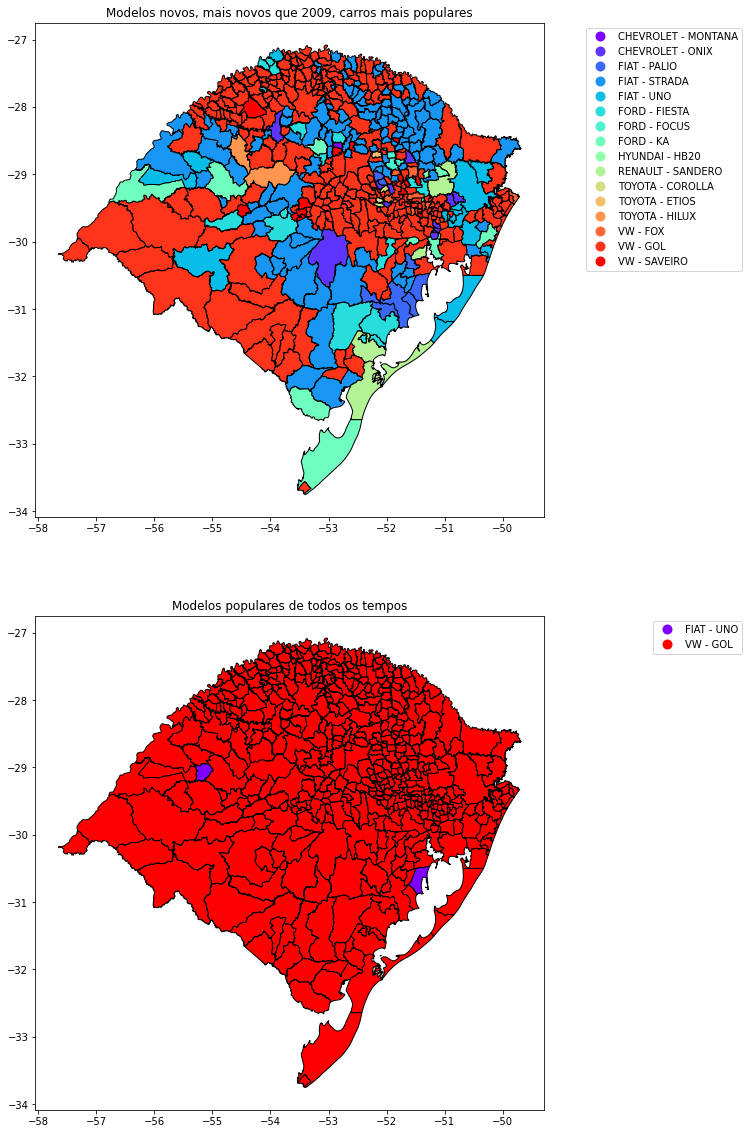

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=2,figsize=(20, 20))


ax1.set_title("Modelos novos, mais novos que 2009, carros mais populares")
RS_INFO.plot(ax=ax1,
             column=RS_INFO.marcas_maior_q_2015 + " - " + RS_INFO.modelo_maior_q_2015,
             cmap='rainbow',
             legend=True,
             edgecolor='black'
             )

leg = ax1.get_legend()
leg.set_bbox_to_anchor((1.4, 1))

ax2.set_title("Modelos populares de todos os tempos")
RS_INFO.plot(ax=ax2,
             column=RS_INFO.marcas_todos_tempos + " - " + RS_INFO.modelo_todos_tempos,
             cmap='rainbow',
             legend=True,
             edgecolor='black'
             )

leg = ax2.get_legend()
leg.set_bbox_to_anchor((1.4, 1))